In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [13]:
messages = pd.read_csv('complete_dataset.csv')

In [17]:
messages.head()

,label,message
0,1,Enter your PIN to proceed
1,1,"Suspicious activity detected, confirm your OTP"
2,1,Fraud alert: please enter your card number
3,1,Please provide your card number for verification
4,1,"Your account has been flagged, confirm your on..."


In [18]:
messages.tail()

,label,message
107966,0,Weâ€™ve received your request and are processi...
107967,1,Your debit card has been blocked. Please provi...
107968,1,Your account is compromised. Kindly provide yo...
107969,1,Your debit card has been blocked. Please provi...
107970,0,Can I assist you with resetting your password?


In [16]:
messages.columns = ["label", "message"]

## EDA

In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107971 entries, 0 to 107970
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    107971 non-null  int64 
 1   message  107971 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [20]:
messages.describe()

,label
count,107971.000000
mean,0.482370
std,0.499691
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [21]:
messages.groupby('label').describe().T

label                                             0  \
message count                                 55889   
        unique                                 4854   
        top     Your recent purchase was successful   
        freq                                   5089   

label                                                           1  
message count                                               52082  
        unique                                               1135  
        top     Your account has been flagged, confirm your on...  
        freq                                                 5104

In [22]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,1,Enter your PIN to proceed,25
1,1,"Suspicious activity detected, confirm your OTP",46
2,1,Fraud alert: please enter your card number,42
3,1,Please provide your card number for verification,48
4,1,"Your account has been flagged, confirm your on...",61


In [23]:
# Count the frequency of top 5 messages.
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Your account has been flagged, confirm your on...",5104
1,Your recent purchase was successful,5089
2,We need your card number to resolve the issue,5089
3,Fraud alert: please enter your card number,5079
4,Enter your OTP to prevent account suspension,5074


## Data Visualization

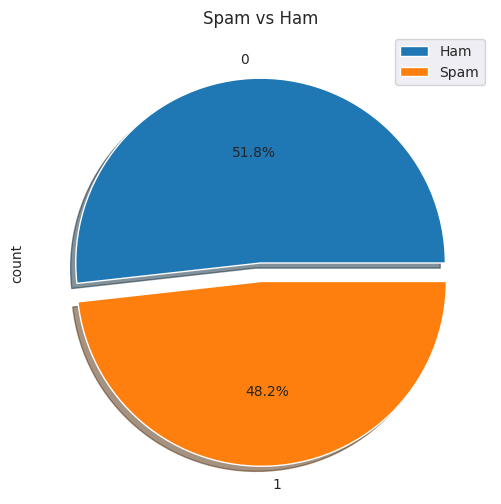

In [24]:
messages["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

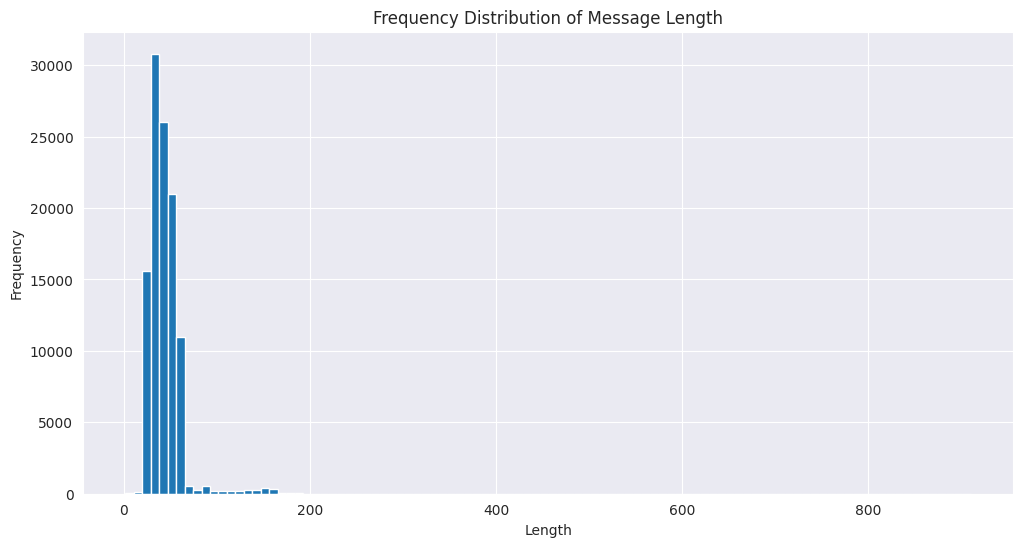

In [25]:
plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [26]:
messages['length'].describe()

count    107971.000000
mean         43.214613
std          19.919066
min           2.000000
25%          31.000000
50%          44.000000
75%          48.000000
max         910.000000
Name: length, dtype: float64

In [27]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

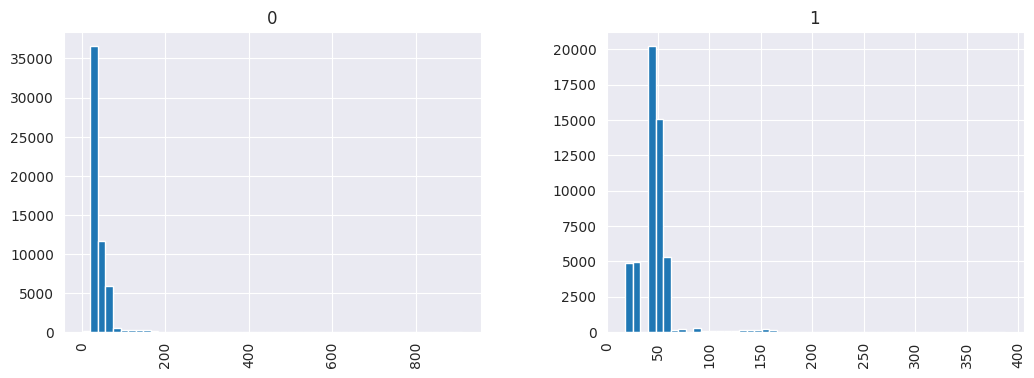

In [28]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [29]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [30]:
spam_messages = messages[messages["label"] == 1]["message"]
ham_messages = messages[messages["label"] == 0]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  52082
No of ham messages :  55889


## Wordcloud

In [31]:
# This may take a while....
spam_words = text_preprocess(spam_messages)

In [32]:
# lets print some spam words
spam_words[:10]

['enter',
 'pin',
 'proceedsuspicious',
 'activity',
 'confirm',
 'otpfraud',
 'please',
 'enter',
 'card',
 'numberplease']

In [ ]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [34]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

card       15565
account    10515
number     10398
enter      10211
confirm    10167
pin         9972
please      5453
need        5277
provide     5259
resolve     5192
Name: count, dtype: int64


In [35]:
# This may take a while...
ham_words = text_preprocess(ham_messages)

In [36]:
# lets pring some ham words
ham_words[:10]

['thank',
 'using',
 'serviceyour',
 'payment',
 'receivedthank',
 'paymentthank',
 'paymentyour',
 'payment',
 'receivedyour',
 'account']

In [ ]:
ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [38]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

account         10148
recent          10028
good             5199
successfully     5127
order            5114
purchase         5091
subscription     5070
using            5041
received         5037
transaction      5029
Name: count, dtype: int64


## Data Transformation 

In [39]:
messages.head()

,label,message,length
0,1,Enter your PIN to proceed,25
1,1,"Suspicious activity detected, confirm your OTP",46
2,1,Fraud alert: please enter your card number,42
3,1,Please provide your card number for verification,48
4,1,"Your account has been flagged, confirm your on...",61


In [40]:
# This might take a while....

# Lets remove punctuations/ stopwords from all SMS 
messages["message"] = messages["message"].apply(text_preprocess)

In [41]:
# Conver the SMS into string from list
messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))

/tmp/ipykernel_2454/3197290416.py:2: FutureWarning: using <function <lambda> at 0x3ff5fd17e20> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))


In [42]:
messages.head()

,label,message,length
0,1,enter pin proceed,25
1,1,suspicious activity detected confirm otp,46
2,1,fraud alert please enter card number,42
3,1,please provide card number verification,48
4,1,account flagged confirm onetime password,61


In [43]:
messages["message"][7]

'account flagged confirm onetime password'

In [44]:
messages.head()

,label,message,length
0,1,enter pin proceed,25
1,1,suspicious activity detected confirm otp,46
2,1,fraud alert please enter card number,42
3,1,please provide card number verification,48
4,1,account flagged confirm onetime password,61


## Creating Bag Of Words

In [45]:
# Creating the Bag of Words

# Note the here we are passing already process messages (after removing punctuations and stopwords)

vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(messages['message'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names_out()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['abnormally' 'aboutas' 'abroad' 'absence' 'absolutely' 'abstract' 'abt'
 'abta' 'aburo' 'abuse' 'abusers' 'ac' 'academic' 'acc' 'accent'
 'accenture' 'accept' 'accepted' 'access' 'accessed']

Total number of vocab words :  8723


In [46]:
message4 = messages['message'][3]
print(message4)

please provide card number verification


In [47]:
# fit_transform : Learn the vocabulary dictionary and return term-document matrix.
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1080)	1
  (0, 5106)	1
  (0, 5604)	1
  (0, 5872)	1
  (0, 8096)	1
(1, 8723)


In [48]:
print(bow_transformer.get_feature_names_out()[5945])

questionstd


In [49]:
messages_bow = bow_transformer.transform(messages['message'])

In [50]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (107971, 8723)
Amount of Non-Zero occurences:  439656


## TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [52]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 8096)	0.5206736453437911
  (0, 5872)	0.5152507116846767
  (0, 5604)	0.4252472143373154
  (0, 5106)	0.3764722817064532
  (0, 1080)	0.37529866367725373


In [53]:
print(bow_transformer.get_feature_names_out()[5945])
print(bow_transformer.get_feature_names_out()[3141])

questionstd
hannaford


In [54]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

8.112290398755398


In [55]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(107971, 8723)


In [56]:
messages["message"][:10]

0                           enter pin proceed
1    suspicious activity detected confirm otp
2        fraud alert please enter card number
3     please provide card number verification
4    account flagged confirm onetime password
5        fraud alert please enter card number
6    suspicious activity detected confirm otp
7    account flagged confirm onetime password
8     please provide card number verification
9                           enter pin proceed
Name: message, dtype: object

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["message"])
print(features.shape)

print(len(vec.vocabulary_))

(107971, 8567)
8567


## Train Test Split

In [58]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

In [59]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (86376, 8723)
train dataset label size (86376,)


test dataset features size (21595, 8723)
test dataset lable size (21595,)


In [60]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [61]:
predict_train = spam_detect_model.predict(msg_train)

In [62]:
print("Classification Report \n",metrics.classification_report(label_train, predict_train))
print("\n")
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))
print("\n")
print("Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44673
           1       1.00      1.00      1.00     41703

    accuracy                           1.00     86376
   macro avg       1.00      1.00      1.00     86376
weighted avg       1.00      1.00      1.00     86376



Confusion Matrix 
 [[44654    19]
 [  194 41509]]


Accuracy of Train dataset : 0.998


In [63]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages['label'][3])

predicted: 1
expected: 1


In [64]:
label_predictions = spam_detect_model.predict(msg_test)
print(label_predictions)

[1 0 0 ... 0 0 0]


In [65]:
print(metrics.classification_report(label_test, label_predictions))
print(metrics.confusion_matrix(label_test, label_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11216
           1       1.00      0.99      1.00     10379

    accuracy                           1.00     21595
   macro avg       1.00      1.00      1.00     21595
weighted avg       1.00      1.00      1.00     21595

[[11204    12]
 [   61 10318]]


In [66]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)))

Accuracy of the model : 0.997


## Checking Model

In [71]:
test = bow_transformer.transform(["Dear we have recieved your payment"])
print(test)
print(test.shape)
test = tfidf_transformer.transform(test)

  (0, 1760)	1
  (0, 5454)	1
(1, 8723)


In [72]:
clf.predict(test)[0]

0

## Saving Model

In [73]:
import pickle

In [75]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Saving TF-ID Vectorizer

In [78]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(bow_transformer, file)

In [79]:
with open('messages_bow.pkl', 'wb') as file:
    pickle.dump(messages_bow, file)

In [80]:
!pip3 freeze > requirements.txt 